In [ ]:
# USE ONLY WHILE WORKING ON COLAB
from google.colab import drive
drive.mount("/content/drive/")

In [1]:
import pandas as pd
import numpy as np

In [4]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path='D:/Coding/Skin_Cancer_Detection/Dataset/hmnist_28_28_RGB.csv'

In [5]:
df = pd.read_csv(path)

In [5]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,168,182,181,157,162,205,179,188,221,199,214,224,202,215,226,201,205,223,198,206,230,207,219,228,201,211,229,203,210,223,...,225,197,195,222,193,193,228,199,202,231,202,204,227,203,206,230,211,219,231,217,223,222,204,207,202,179,180,205,180,181,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,111,107,130,108,104,136,112,111,148,125,125,155,132,134,157,132,132,164,138,137,187,161,161,198,172,173,202,175,175,209,...,207,179,179,195,164,162,197,168,169,203,176,180,192,165,165,188,162,162,184,162,164,185,162,163,161,137,135,155,132,129,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,164,167,195,173,175,210,191,199,212,195,201,210,189,193,218,194,203,217,191,195,217,195,199,224,201,203,236,211,215,250,...,200,169,165,217,183,179,241,211,210,242,216,215,239,214,213,234,208,208,224,198,196,206,180,177,226,202,201,214,192,190,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,124,142,173,134,149,177,139,156,181,141,159,183,137,154,185,139,160,185,145,165,186,148,162,189,157,170,190,155,169,191,...,189,141,159,192,167,179,193,173,183,192,171,181,190,164,171,190,162,171,190,168,179,194,177,187,192,170,180,186,163,165,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,145,127,177,144,122,177,146,123,179,148,126,185,157,140,177,142,113,174,138,112,177,141,117,175,139,108,178,145,117,181,...,183,150,136,178,141,116,184,151,135,188,160,147,183,153,131,180,146,131,173,137,115,157,88,68,146,32,47,145,24,48,159,79,82,174,137,125,175,139,126,6


In [6]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [7]:
print(len(train_set))

8012


In [8]:
print(len(test_set))

2003


In [9]:
df.label.unique()

array([2, 4, 0, 1, 5, 6, 3], dtype=int64)

In [10]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}


In [11]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


D:\Anaconda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

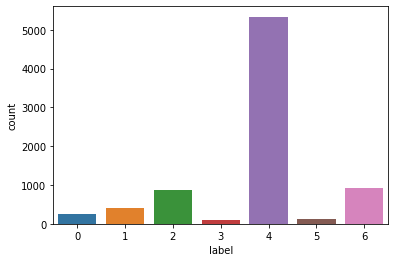

In [14]:
import seaborn as sns
sns.countplot(train_set['label'])

In [17]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

D:\Anaconda\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

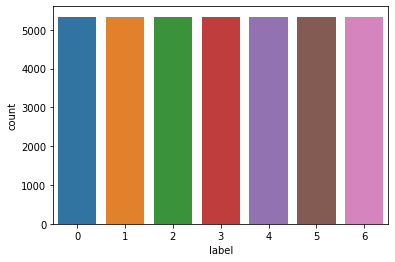

In [18]:
sns.countplot(y_train)

In [19]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  5334
Number of  basal cell carcinoma(Cancer) images:  5334
Number of  benign keratosis-like lesions(Non-Cancerous) images:  5334
Number of  dermatofibroma(Non-Cancerous) images:  5334
Number of  melanocytic nevi(Non-Cancerous) images:  5334
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  5334
Number of  melanoma(Cancer) images:  5334


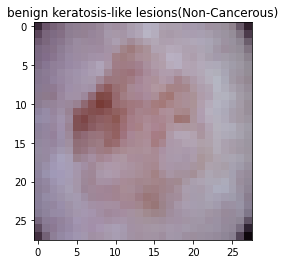

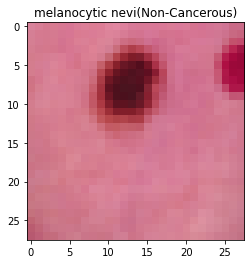

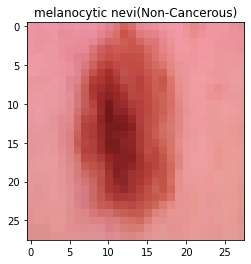

In [20]:
import matplotlib.pyplot as plt
import random
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [22]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          2

In [ ]:
#Checkpoint
callback = tf.keras.callbacks.ModelCheckpoint('D:/Coding/Skin_Cancer_Detection/Checkpoints/model-{epoch:3d}.hdf5', monitor='val_accuracy', mode='auto', verbose=0, save_best_only=True)


In [ ]:
Optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 55s 226ms/step - loss: 1.5970 - accuracy: 0.4270 - val_loss: 2.7615 - val_accuracy: 0.1671
Epoch 2/50
235/235 [==============================] - 51s 218ms/step - loss: 0.4430 - accuracy: 0.8532 - val_loss: 1.7377 - val_accuracy: 0.3910
Epoch 3/50
235/235 [==============================] - 51s 219ms/step - loss: 0.2687 - accuracy: 0.9068 - val_loss: 1.0800 - val_accuracy: 0.5614
Epoch 4/50
235/235 [==============================] - 51s 218ms/step - loss: 0.2037 - accuracy: 0.9285 - val_loss: 0.6539 - val_accuracy: 0.7073
Epoch 5/50
235/235 [==============================] - 51s 219ms/step - loss: 0.1672 - accuracy: 0.9431 - val_loss: 0.7810 - val_accuracy: 0.6240
Epoch 6/50
235/235 [==============================] - 51s 218ms/step - loss: 0.1356 - accuracy: 0.9538 - val_loss: 0.7265 - val_accuracy: 0.6360
Epoch 7/50
235/235 [==============================] - 51s 219ms/step - loss: 0.1055 - accuracy: 0.9641 - val_loss: 0.5894 - val_ac

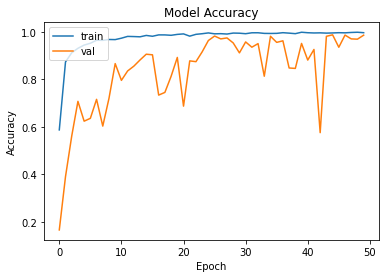

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

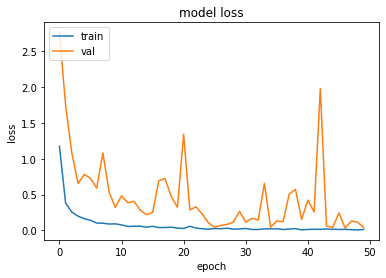

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.load_weights('D:/Coding/Skin_Cancer_Detection/Checkpoints/model-45.hdf5')

In [ ]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

In [30]:
import PIL
img = PIL.Image.open('D:/Coding/Skin_Cancer_Detection/testing images/moleimgs.jpg')
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)

# print(result[0])

result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

dermatofibroma(Non-Cancerous)
Confidence:  64.04440402984619 %
